In [1]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
df =  pd.read_csv('D:\Project\project-ednn\Code\Final_dataset_Diabetes_Complication.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,3,1,1,1,1,1,1,1,3,1,...,1,3,1,2,2,1,2,2,1,2
1,5,3,1,1,2,4,2,1,5,1,...,1,2,2,2,2,2,2,2,1,1
2,4,1,1,1,2,1,2,2,2,2,...,2,3,1,2,2,2,2,2,2,1
3,4,1,1,1,2,4,2,1,1,1,...,2,3,2,2,2,2,1,2,1,2
4,2,1,1,3,1,3,1,1,1,1,...,1,3,1,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604073,3,1,1,1,1,4,1,1,1,1,...,1,3,2,2,2,2,2,2,2,2
604074,2,1,1,1,1,4,1,1,5,1,...,1,2,2,2,2,1,2,2,2,1
604075,1,2,1,1,1,3,1,1,2,1,...,1,3,1,2,2,2,2,2,2,1
604076,3,1,2,1,1,3,1,1,2,2,...,1,3,2,2,2,2,2,1,2,2


In [3]:
df = df.drop_duplicates(ignore_index=True)

In [4]:
scaler = MinMaxScaler()
scaler.fit(df)

# Transform the DataFrame to obtain the normalized data
df_normalized = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [5]:
X = df_normalized.iloc[:, :26]
y = df_normalized.iloc[:, 26:]
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26
0,0.50,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.4,0.0,...,1.0,0.0,0.000000,0.333333,1.0,1.0,0.666667,0.0,1.0,0.0
1,1.00,1.0,0.0,0.000000,1.0,1.000000,1.0,0.0,0.8,0.0,...,1.0,0.0,0.285714,1.000000,0.5,1.0,0.000000,0.0,0.5,1.0
2,0.75,0.0,0.0,0.000000,1.0,0.000000,1.0,1.0,0.2,0.5,...,1.0,0.0,0.000000,0.333333,0.0,1.0,0.666667,1.0,1.0,0.0
3,0.75,0.0,0.0,0.000000,1.0,1.000000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,1.000000,1.0,0.0,0.666667,1.0,1.0,1.0
4,0.25,0.0,0.0,0.666667,0.0,0.666667,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.333333,0.0,1.0,0.666667,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543770,0.00,0.0,1.0,0.000000,0.0,1.000000,0.0,0.0,0.8,0.5,...,1.0,0.0,1.000000,0.333333,0.0,1.0,0.666667,1.0,1.0,0.0
543771,0.25,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.8,0.0,...,0.0,0.0,0.142857,1.000000,0.5,0.0,0.000000,0.0,0.5,1.0
543772,0.00,0.5,0.0,0.000000,0.0,0.666667,0.0,0.0,0.2,0.0,...,1.0,1.0,0.000000,0.333333,1.0,0.0,0.666667,0.0,1.0,0.0
543773,0.50,0.0,1.0,0.000000,0.0,0.666667,0.0,0.0,0.2,0.5,...,1.0,0.0,0.000000,0.666667,0.5,1.0,0.666667,0.0,1.0,1.0


              precision    recall  f1-score   support

           0       0.00      0.28      0.00        43
           1       1.00      0.95      0.98    108712

    accuracy                           0.95    108755
   macro avg       0.50      0.62      0.49    108755
weighted avg       1.00      0.95      0.97    108755



[09:23:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


              precision    recall  f1-score   support

           0       0.02      0.44      0.03       282
           1       1.00      0.94      0.97    108473

    accuracy                           0.94    108755
   macro avg       0.51      0.69      0.50    108755
weighted avg       1.00      0.94      0.96    108755



[09:23:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


              precision    recall  f1-score   support

           0       0.01      0.38      0.02       203
           1       1.00      0.94      0.97    108552

    accuracy                           0.94    108755
   macro avg       0.51      0.66      0.50    108755
weighted avg       1.00      0.94      0.97    108755



[09:23:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


              precision    recall  f1-score   support

           0       0.00      0.43      0.01        37
           1       1.00      0.95      0.97    108718

    accuracy                           0.95    108755
   macro avg       0.50      0.69      0.49    108755
weighted avg       1.00      0.95      0.97    108755



[09:23:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[09:23:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


              precision    recall  f1-score   support

           0       0.00      0.45      0.01       110
           1       1.00      0.90      0.95    108645

    accuracy                           0.90    108755
   macro avg       0.50      0.67      0.48    108755
weighted avg       1.00      0.90      0.95    108755



[09:23:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


              precision    recall  f1-score   support

           0       0.64      0.68      0.66     40309
           1       0.80      0.78      0.79     68446

    accuracy                           0.74    108755
   macro avg       0.72      0.73      0.72    108755
weighted avg       0.74      0.74      0.74    108755



[09:23:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


              precision    recall  f1-score   support

           0       0.53      0.70      0.61     35407
           1       0.83      0.70      0.76     73348

    accuracy                           0.70    108755
   macro avg       0.68      0.70      0.68    108755
weighted avg       0.73      0.70      0.71    108755



[09:24:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


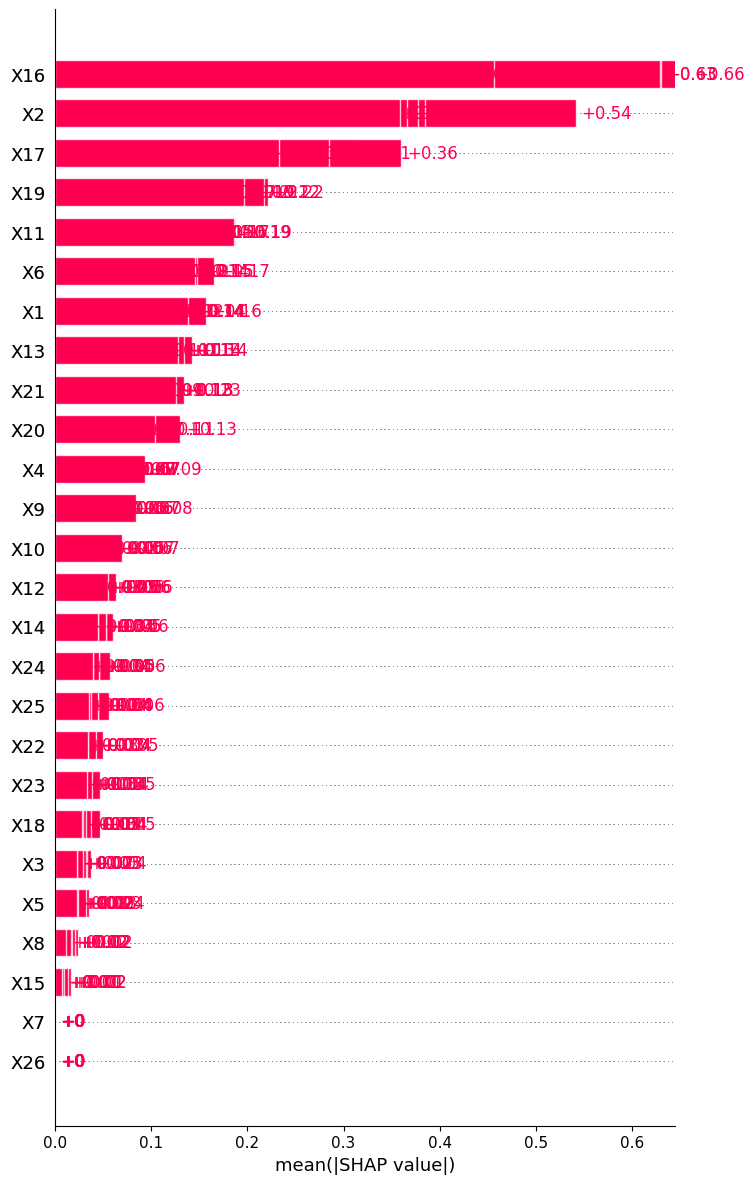

In [12]:
for i in range(7):
    X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:, i], test_size = 0.2)
    clf = xgb.XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(classification_report(y_pred, y_test))

    explainer = shap.Explainer(clf, X_test)
    shap_values = explainer(X_test[:1000])
    shap.plots.bar(shap_values, max_display=26, show=False)
    plt.savefig(f'Results/Label{i+1}_Bar.png', dpi=600, bbox_inches='tight')